# Train character embeddings using word2vec skipgram approach 

We look at ith character and try to predict (i-1) and (i+1) character

In [25]:
!ls /content/drive/NLP_bootcamp/Data/harry_potter_3.txt

/content/drive/NLP_bootcamp/Data/harry_potter_3.txt


In [0]:
#for inline plotting in notebooks
%matplotlib inline  

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get data

In [29]:
# load data
path = "/content/drive/NLP_bootcamp/Data/harry_potter_3.txt"
text = open(path).read()

corpus_length = len(text)

print('corpus length:', corpus_length)

corpus length: 611606


In [30]:
unique_chars = list(set(text))
print('total no of unique chars:', len(unique_chars))

print ("\nSet of characters : \n" + str(unique_chars))

total no of unique chars: 79

Set of characters : 
['d', 'D', ',', '2', 'M', ' ', 'm', '-', 'i', 'U', 'w', '\\', '`', 'P', 'R', '9', 'T', '!', 'v', 'W', 'o', 'a', 'u', '.', '\n', 't', 'H', '*', 'F', 'J', 'z', 'p', '4', 'N', 'e', 'Z', 'x', 'r', 'B', 'l', 'b', 's', 'q', ':', 'Q', '1', 'k', 'Y', 'c', '0', 'S', 'f', '5', "'", 'G', 'j', 'L', 'n', 'y', 'C', 'E', 'O', 'I', '"', 'V', '3', '&', ')', ';', '?', 'X', 'g', '(', 'h', '7', 'A', 'K', '_', '6']


In [0]:
def classToOneHot(item, classes):

	x = [0. for _ in classes]
	
	x[classes.index(item)] = 1.

	return x

In [32]:
classToOneHot('a', unique_chars)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [0]:
def findClosest(labels, coords, n=3):
	def dist(p1, p2):
		return np.linalg.norm(np.array(p1)-np.array(p2))
	for label, pos in zip(labels, coords):
		print(label)
		dists = []
		for l2, p2 in zip(labels, coords):
			if l2==label: continue
			dists.append((l2, dist(pos, p2)))
		dists = sorted(dists, key=lambda x : x[1])
		if n == -1:
			if dists[0][1] >= 0.2:
				print("\t{}\t{}".format(dists[0][0], dists[0][1]))
			else:
				for d in dists:
					if d[1] <= 0.15:
						print("\t{}\t{}".format(d[0], d[1]))
		else:		
			for d in dists[:n]:
				print("\t{}\t{}".format(d[0], d[1]))

In [0]:
# prepare training data X, y
# both X,y are are characters 

skip_window = 1 # how much we see on either side of center word
global_index = skip_window # 

X = []
y = []

for i in range(global_index, (corpus_length - skip_window)):

    #print i
    
    X_char = text[i]
    y1_char = text[i-1]
    y2_char = text[i+1]
    
    #print X_char
    #print y1_char, y2_char
    X.append(classToOneHot(X_char, unique_chars))
    yp=[classToOneHot(y1_char, unique_chars), classToOneHot(y2_char, unique_chars)] 
    
    y.append(yp)
    
X=np.array(X)    
    

In [35]:
print(np.shape(X), np.shape(y), (len(unique_chars),), )

(611604, 79) (611604, 2, 79) (79,)


In [0]:
nb_cols = len(y[0])
y_cols = [np.array([v[i] for v in y], np.float32) for i in range(nb_cols)]

input_layer = Input(shape=(len(unique_chars),))
encoding = Dense(2, activation='linear')(input_layer)

output_1 = Dense(len(unique_chars), activation='softmax')(encoding)
output_2 = Dense(len(unique_chars), activation='softmax')(encoding)

model = Model(inputs=[input_layer], outputs=[output_1, output_2])#, output_3, output_4])

encoder = Model(inputs = [input_layer], outputs=[encoding])

# when using larger windows, remember to add more loss weights
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', loss_weights=[0.5, 0.5])

#model.fit(X, y_cols, nb_epoch=15, batch_size=1024, shuffle=True, verbose=True)

In [37]:
model.fit(X , y_cols, epochs=15, batch_size=1024, shuffle=True, verbose=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/15
611604/611604 [==============================] - 9s 16us/step - loss: 3.7473 - dense_5_loss: 3.7473 - dense_6_loss: 3.7473
Epoch 2/15
611604/611604 [==============================] - 5s 8us/step - loss: 3.1494 - dense_5_loss: 3.1536 - dense_6_loss: 3.1452
Epoch 3/15
611604/611604 [==============================] - 5s 8us/step - loss: 3.0351 - dense_5_loss: 3.0335 - dense_6_loss: 3.0366
Epoch 4/15
611604/611604 [==============================] - 5s 8us/step - loss: 2.9670 - dense_5_loss: 2.9582 - dense_6_loss: 2.9757
Epoch 5/15
611604/611604 [==============================] - 5s 8us/step - loss: 2.9359 - dense_5_loss: 2.9334 - dense_6_loss: 2.9384
Epoch 6/15
611604/611604 [==============================] - 5s 8us/step - loss: 2.9204 - dense_5_loss: 2.9261 - dense_6_loss: 2.9146
Epoch 7/15
611604/611604 [==============================] - 5s 8us/step - loss: 2.9122 - dense_5_loss: 2.9

In [38]:
x2 = [classToOneHot(ch, unique_chars) for ch in unique_chars[:-1]]
encodings = encoder.predict(np.array(x2))
for ch, e in zip(unique_chars[:-1], encodings):
    print("{}\t{}\t{}".format(ch, e[0], e[1]))

d	0.8480015993118286	-3.071993589401245
D	1.9145036935806274	-1.1364400386810303
,	-0.3209437131881714	-1.9606263637542725
2	0.5666546821594238	-0.3317507803440094
M	2.4053866863250732	-1.265411138534546
 	-0.007819831371307373	-0.44611817598342896
m	2.157180070877075	-2.3798983097076416
-	-0.788184642791748	-1.9868220090866089
i	1.6024972200393677	0.17167991399765015
U	0.5514820218086243	0.2713876962661743
w	2.6179440021514893	-1.8469085693359375
\	0.4879927933216095	-0.5129120349884033
`	0.6674946546554565	-0.808260977268219
P	2.785186290740967	-1.184247374534607
R	1.7328362464904785	-1.6204140186309814
9	0.5213857293128967	-0.7358134388923645
T	0.21381208300590515	-1.871678113937378
!	-1.1462337970733643	-2.206681251525879
v	3.416311740875244	-3.1505396366119385
W	1.2996668815612793	-2.227116584777832
o	1.4665076732635498	-0.08558213710784912
a	1.7222235202789307	0.09230560064315796
u	1.5592610836029053	-0.28462544083595276
.	-0.8151683807373047	-2.208906650543213

	-1.0151841640472

d
	g	0.19722166657447815
	n	0.7330068349838257
D
	S	0.2960737347602844
	J	0.31433993577957153
,
	;	0.38042715191841125
	-	0.4679746627807617
2
	\	0.19750213623046875
	0	0.26556694507598877
M
	F	0.19955025613307953
	l	0.27878236770629883
 
	1	0.15730886161327362
	*	0.2120707929134369
m
	c	0.20091302692890167
	V	0.5276595950126648
-
	.	0.22371792793273926
	!	0.4201633930206299
i
	a	0.14364773035049438
	o	0.29099300503730774
U
	A	0.19747506082057953
	E	0.34720784425735474
w
	V	0.24691474437713623
	k	0.24723799526691437
\
	X	0.12083932757377625
	2	0.19750213623046875
`
	3	0.0975273922085762
	7	0.10833479464054108
P
	M	0.3883751928806305
	F	0.42779114842414856
R
	r	0.1748570054769516
	J	0.2971067428588867
9
	4	0.09506338834762573
	X	0.12801796197891235
T
	)	0.08075986802577972
	;	0.19012942910194397
!
	?	0.26389142870903015
	.	0.3310728967189789
v
	z	0.7072681784629822
	m	1.4762455224990845
W
	s	0.22382713854312897
	t	0.34473034739494324
o
	u	0.21959379315376282
	i	0.29099300503730774
a
	i	

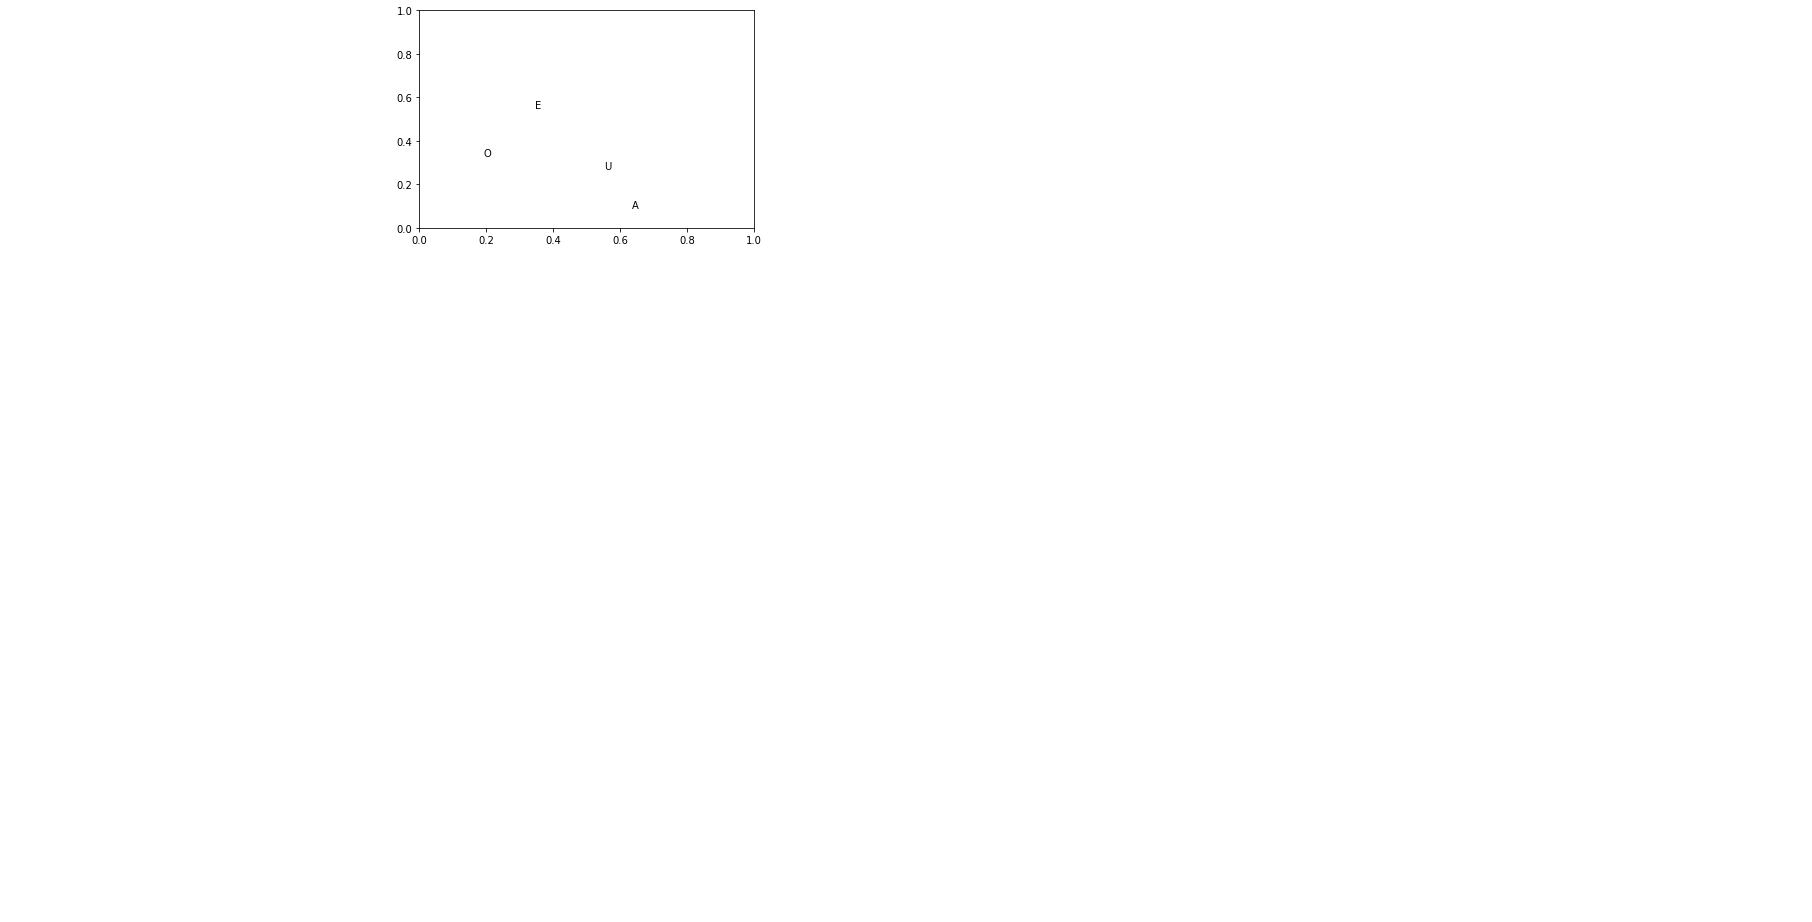

In [39]:
labels = unique_chars[:-1]
xd = [e[0] for e in encodings]
yd = [e[1] for e in encodings]
fig, ax = plt.subplots()
for i, txt in enumerate(labels):
    _ = ax.annotate(txt, (xd[i],yd[i]))


findClosest(labels, encodings, n=2)

plt.show()